In [1]:
import pandas as pd

In [2]:
orders = pd.read_csv('./datasets/instacart_orders.csv', sep=';')
products = pd.read_csv('./datasets/products.csv', sep=';')
departments = pd.read_csv('./datasets/departments.csv', sep=';')
aisles = pd.read_csv('./datasets/aisles.csv', sep=';')
order_products = pd.read_csv('./datasets/order_products.csv', sep=';')

In [3]:
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [4]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [316]:
orders[orders.duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


In [6]:
orders.duplicated().sum()

15

In [7]:
orders[orders.duplicated(subset='order_id')]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


In [319]:
orders.duplicated(subset='order_id').sum()

15

In [320]:
products[products.duplicated()]

,product_id,product_name,aisle_id,department_id


In [321]:
products[products.duplicated(subset='product_id')]

,product_id,product_name,aisle_id,department_id


In [326]:
products['product_name'].str.lower().duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
49689     True
49690     True
49691     True
49692     True
49693     True
Name: product_name, Length: 49694, dtype: bool

In [327]:
products['product_name'].str.lower().duplicated().sum()

1361

In [337]:
products['product_name'].isna().sum()

1258

In [345]:
products[(~products['product_name'].isna()) & (products['product_name'].str.lower().duplicated())]

,product_id,product_name,aisle_id,department_id
2058,2059,Biotin 1000 Mcg,47,11
5455,5456,Green Tea With Ginseng and Honey,96,20
5558,5559,Cream Of Mushroom Soup,69,15
7558,7559,Cinnamon Rolls with Icing,105,13
9037,9038,American Cheese slices,21,16
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [346]:
products[products['product_name'].isna() == 0]['product_name'].str.lower().duplicated().sum()

104

In [347]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [349]:
order_products.duplicated().sum()

0

In [351]:
order_products.duplicated(subset=['order_id', 'product_id']).sum()

0

In [354]:
products.isna().sum()

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

In [356]:
products[products['product_name'].isna()]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


In [359]:
products[(products['product_name'].isna()) & (products['aisle_id'] != 100)]

,product_id,product_name,aisle_id,department_id


In [360]:
products[(products['product_name'].isna()) & (products['department_id'] != 21)]

,product_id,product_name,aisle_id,department_id


In [364]:
products.fillna('Unknown', inplace = True)

In [365]:
products.isna().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [366]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [367]:
orders.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28819
dtype: int64

In [369]:
orders[orders['days_since_prior_order'].isna()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478895,2589657,205028,1,0,16,NaN
478896,2222353,141211,1,2,13,NaN
478922,2272807,204154,1,1,15,NaN
478926,2499542,68810,1,4,19,NaN


In [370]:
orders[(orders['days_since_prior_order'].isna()) & (orders['order_number'] != 1)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


In [372]:
orders.fillna(0, inplace=True)

In [373]:
orders.isna().sum()

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

In [374]:
order_products.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [375]:
order_products[order_products['add_to_cart_order'].isna()]

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [376]:
order_products['add_to_cart_order'].min()

1.0

In [377]:
order_products['add_to_cart_order'].max()

64.0

In [383]:
orders_ids_faltantes = order_products[order_products['add_to_cart_order'].isna()]['order_id'].unique()
orders_ids_faltantes = sorted(list(orders_ids_faltantes))
orders_ids_faltantes

[9310,
 61355,
 102236,
 129627,
 165801,
 171934,
 180546,
 264710,
 293169,
 388234,
 404157,
 678116,
 733526,
 747668,
 813364,
 844733,
 854647,
 871281,
 888470,
 903110,
 936852,
 1021563,
 1038146,
 1169835,
 1183255,
 1220886,
 1302315,
 1308785,
 1386261,
 1477139,
 1529171,
 1564093,
 1598369,
 1625713,
 1633337,
 1648217,
 1673227,
 1677118,
 1713430,
 1717990,
 1730767,
 1800005,
 1832957,
 1888628,
 1916118,
 1959075,
 1961723,
 1968313,
 2094761,
 2136777,
 2170451,
 2256933,
 2409109,
 2449164,
 2470674,
 2479011,
 2621907,
 2625444,
 2652650,
 2721963,
 2729254,
 2849370,
 2926893,
 2979697,
 2997021,
 2999801,
 3125735,
 3308010,
 3347453,
 3383594]

In [388]:
order_products.groupby('order_id')['product_id'].count().sort_values(ascending = False)

order_id
61355      127
3308010    115
2136777    108
171934     104
1959075     98
          ... 
2231165      1
816908       1
2230951      1
112056       1
3421079      1
Name: product_id, Length: 450046, dtype: int64

In [391]:
order_products[order_products['order_id'].isin(orders_ids_faltantes)].groupby('order_id')['product_id'].count().sort_values(ascending = False)

order_id
61355      127
3308010    115
2136777    108
171934     104
1959075     98
          ... 
888470      65
1598369     65
747668      65
1677118     65
9310        65
Name: product_id, Length: 70, dtype: int64

In [392]:
len(orders_ids_faltantes)

70

In [393]:
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999).astype('int')

In [394]:
order_products.isna().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [395]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  478967 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [400]:
compras_hora_del_dia = orders['order_hour_of_day'].value_counts().sort_index()

In [416]:
orders.groupby('order_hour_of_day')['order_id'].count().sort_index()

order_hour_of_day
0      3180
1      1763
2      1004
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: order_id, dtype: int64

In [401]:
import matplotlib.pyplot as plt

In [406]:
type(compras_hora_del_dia)

pandas.core.series.Series

In [414]:
compras_hora_del_dia

order_hour_of_day
0      3180
1      1763
2      1004
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: count, dtype: int64

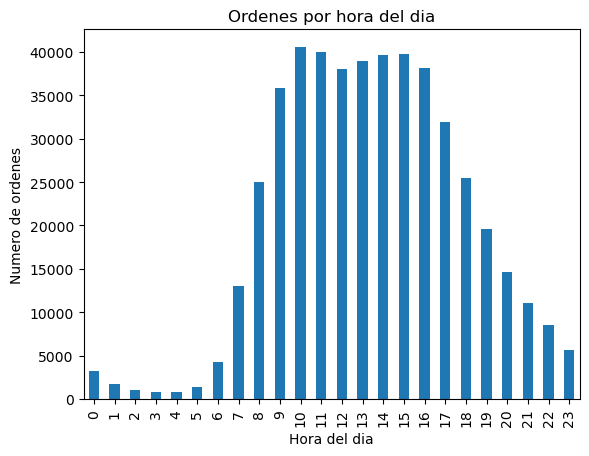

In [404]:
compras_hora_del_dia.plot(
    kind='bar',
    title='Ordenes por hora del dia',
    xlabel='Hora del dia',
    ylabel='Numero de ordenes'
)
plt.show()

In [418]:
orders['order_dow'].unique()

array([6, 5, 0, 4, 3, 1, 2])

In [419]:
miercoles_filtro = orders['order_dow'] == 3

In [422]:
ordenes_miercoles = orders[miercoles_filtro]['order_hour_of_day'].value_counts().sort_index()

In [423]:
ordenes_miercoles

order_hour_of_day
0      373
1      215
2      121
3      101
4      108
5      170
6      643
7     1732
8     3125
9     4490
10    5026
11    5004
12    4688
13    4674
14    4774
15    5163
16    4976
17    4175
18    3463
19    2652
20    1917
21    1450
22    1154
23     718
Name: count, dtype: int64

In [425]:
sabado_filtro = orders['order_dow'] == 6

In [426]:
ordenes_sabado = orders[sabado_filtro]['order_hour_of_day'].value_counts().sort_index()

In [427]:
ordenes_sabado

order_hour_of_day
0      464
1      254
2      177
3      125
4      118
5      161
6      451
7     1619
8     3246
9     4311
10    4919
11    5116
12    5132
13    5323
14    5375
15    5188
16    5029
17    4295
18    3338
19    2610
20    1847
21    1473
22    1185
23     893
Name: count, dtype: int64

In [428]:
miercoles_y_sabado = pd.concat([ordenes_sabado, ordenes_miercoles], axis = 1)

In [430]:
miercoles_y_sabado.columns = ['Sabado', 'Miercoles']

In [431]:
miercoles_y_sabado

,Sabado,Miercoles
order_hour_of_day,,
0,464,373
1,254,215
2,177,121
3,125,101
4,118,108
5,161,170
6,451,643
7,1619,1732
8,3246,3125


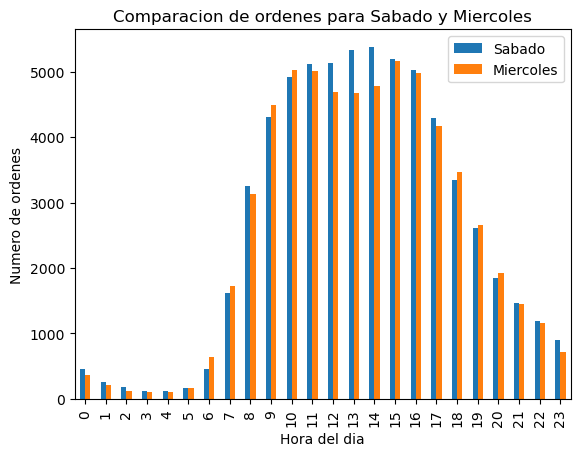

In [434]:
miercoles_y_sabado.plot(
    kind='bar',
    title='Comparacion de ordenes para Sabado y Miercoles',
    xlabel='Hora del dia',
    ylabel='Numero de ordenes'
)
plt.show()

In [435]:
total_productos_por_ordenes = order_products.groupby('order_id')['product_id'].count()

In [438]:
histograma_valores = total_productos_por_ordenes.value_counts().sort_index()

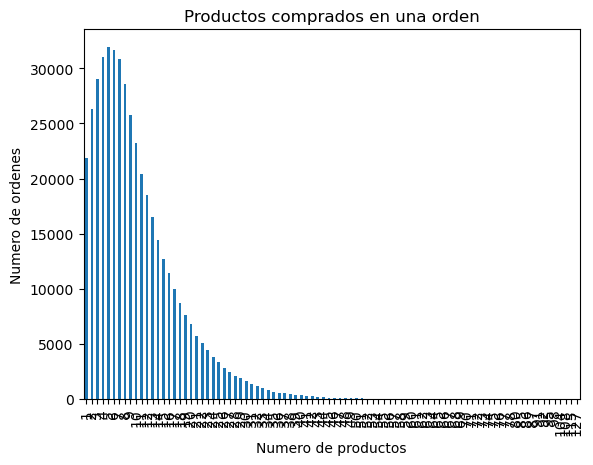

In [452]:
histograma_valores.plot(
    kind='bar',
    title='Productos comprados en una orden',
    xlabel='Numero de productos',
    ylabel='Numero de ordenes'
)
plt.show()

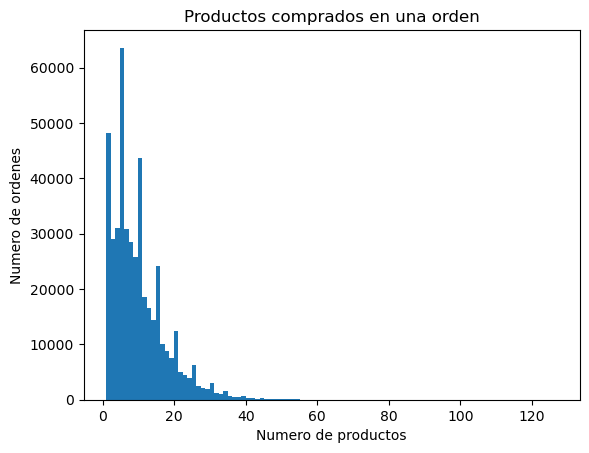

In [455]:
total_productos_por_ordenes.plot(
    kind='hist',
    bins=100,
    title='Productos comprados en una orden',
    xlabel='Numero de productos',
    ylabel='Numero de ordenes'
)
plt.show()